Key Insights:

1: Individuals with sleep disorders like sleep apnea and insomnia experience a greater improvement in sleep quality with longer sleep durations compared to those without these disorders.

2: Men exhibit lower sleep quality compared to women.

3: Men experience higher stress levels than women, which may contribute to their lower average sleep quality.

4: Higher age and sleep duration positively impact sleep quality.

5: Higher stress levels and heart rate negatively influence sleep quality.

6: Increased physical activity has a small positive effect on sleep quality.

7: Stress negatively impacts women's sleep quality more than men's.

8: Men experience higher stress levels than women, which may contribute to lower average sleep quality in men.


1: Import libraries and data (Read CSV file) and set figure style

In [774]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [775]:
#df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv") #For Kaggle
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")  #For VSCODE

In [776]:
sns.set_style("darkgrid")

2: Checking data for missing values and general data structure + data cleaning

In [777]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [778]:
#Renaming columns so theres no spacing in the names
d = {"Person ID":"Person_ID",
     "Sleep Duration":"Sleep_Duration",
     "Quality of Sleep":"Quality_of_Sleep",
     "Physical Activity Level":"Physical_Activity_Level",
     "Stress Level":"Stress_Level",
     "BMI Category":"BMI_Category",
     "Blood Pressure":"Blood_Pressure",
     "Heart Rate":"Heart_Rate",
     "Daily Steps":"Daily_Steps",
     "Sleep Disorder":"Sleep_Disorder"}

df.rename(columns=d,inplace=True)

In [779]:
df.info

<bound method DataFrame.info of      Person_ID  Gender  Age            Occupation  Sleep_Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                   6                       42             6  

In [780]:
df.isna().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [781]:
df.dtypes

Person_ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep_Duration             float64
Quality_of_Sleep             int64
Physical_Activity_Level      int64
Stress_Level                 int64
BMI_Category                object
Blood_Pressure              object
Heart_Rate                   int64
Daily_Steps                  int64
Sleep_Disorder              object
dtype: object

Checked all unique values for columns containing strings, Gender, Occupation, Sleep_Disorder and BMI_Category. Noticed that in the BMI_Category column there where two similar values "Normal" and "Normal Weight", Checked the mean value for Quality_of_Sleep and Sleep_Duration.

In [782]:
df["BMI_Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [783]:
""" Checked """
df[df["BMI_Category"] == "Normal Weight"]["Quality_of_Sleep"].mean()
df[df["BMI_Category"] == "Normal Weight"]["Sleep_Duration"].mean()
df[df["BMI_Category"] == "Normal"]["Quality_of_Sleep"].mean()
df[df["BMI_Category"] == "Normal"]["Sleep_Duration"].mean()

7.393846153846165

In [784]:
# df["Gender"].unique()
# df["Occupation"].unique()
# df["Sleep_Disorder"].unique()
df["BMI_Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

Renamed All rows in column == "Normal Weight" to just Normal

In [785]:
df["BMI_Category"] = df["BMI_Category"].replace("Normal Weight", "Normal").copy()
df["BMI_Category"].unique()

#Data set includes very few incidents of people categorized as obese


array(['Overweight', 'Normal', 'Obese'], dtype=object)

After doing some more data exploration and analysis, I`ve decided to remove all rows that contain people who are categorized as obese, as there is not enough data in these columns. If you wish to see graphs with these values included, # out the code below and run all codes again. 

In [786]:

df = df[df["BMI_Category"]!="Obese"]


3: EDA:

In [787]:
#df["BMI_Category"].value_counts()           #Data set includes very few incidents of people categorized as obese, 10 obese people included in the dataset, compared to 216 Normal and 148 Overweight

df["Gender"].value_counts()                 #Gender Distribution almost 1 to 1, 189 male vs 184 female

#df[["Occupation","Gender"]].value_counts()   #When looking at occupation gender distribution gets skewed, no male nurses, only 2 female doctors vs 69 male doctors, Engineer is similar 31 vs 34.

Female    184
Male      180
Name: Gender, dtype: int64

Good gender distribution in data set, but not on a occupation level.

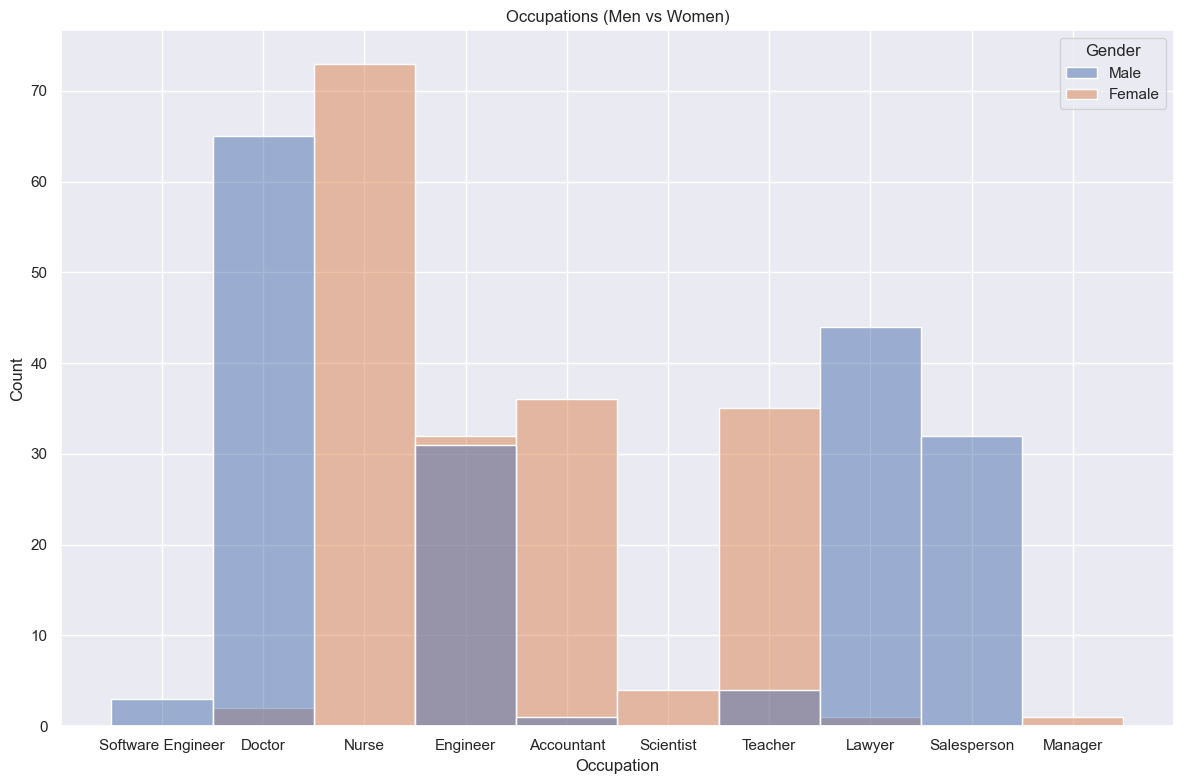

In [788]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.histplot(x="Occupation",data=df,hue = "Gender").set(title="Occupations (Men vs Women)")
sns.set(rc = {'figure.figsize':(12,4)})

plt.tight_layout
plt.show()

Created heatmap based off correlation table to look for any initial insights.
Sleep duration and quality seems to be somewhat correlated, same with heart rate and stress. 

In [789]:
df[["Quality_of_Sleep","Physical_Activity_Level","Sleep_Duration","Stress_Level","Heart_Rate","Daily_Steps"]].corr()



,Quality_of_Sleep,Physical_Activity_Level,Sleep_Duration,Stress_Level,Heart_Rate,Daily_Steps
Quality_of_Sleep,1.000000,0.158212,0.885014,-0.901934,-0.746408,-0.038224
Physical_Activity_Level,0.158212,1.000000,0.189300,-0.006131,0.190034,0.821471
Sleep_Duration,0.885014,0.189300,1.000000,-0.805219,-0.615121,-0.061104
Stress_Level,-0.901934,-0.006131,-0.805219,1.000000,0.809217,0.218735
Heart_Rate,-0.746408,0.190034,-0.615121,0.809217,1.000000,0.223339
Daily_Steps,-0.038224,0.821471,-0.061104,0.218735,0.223339,1.000000


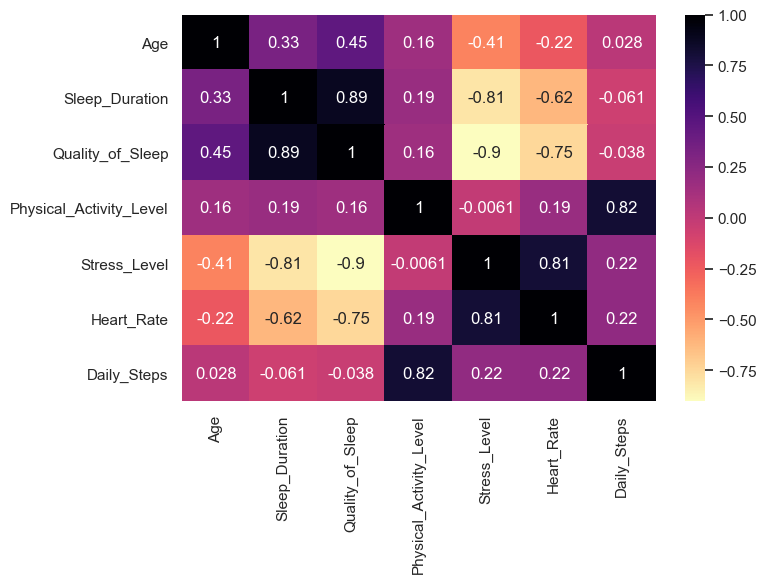

In [790]:

corr = df.loc[:, df.columns != "Person_ID"].corr()
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(data=corr,cmap="magma_r",annot=True)
plt.tight_layout

plt.show()

In [791]:
""" Run Code to see Clustermap, will show the same as the heatmap above, however in a more "structured" way."""
# sns.clustermap(data=corr,cmap="magma_r",annot=True)
# plt.tight_layout
# plt.show()

' Run Code to see Clustermap, will show the same as the heatmap above, however in a more "structured" way.'

A pairplot was generated to explore the relationships between various parameters. 

The results indicate that higher age and sleep duration have a positive impact on sleep quality. On the other hand, higher stress levels and heart rate appear to negatively influence sleep quality. Additionally, there seems to be a small positive effect on sleep quality with increased physical activity. These observations offer valuable insights into how different factors may contribute to variations in sleep quality. 

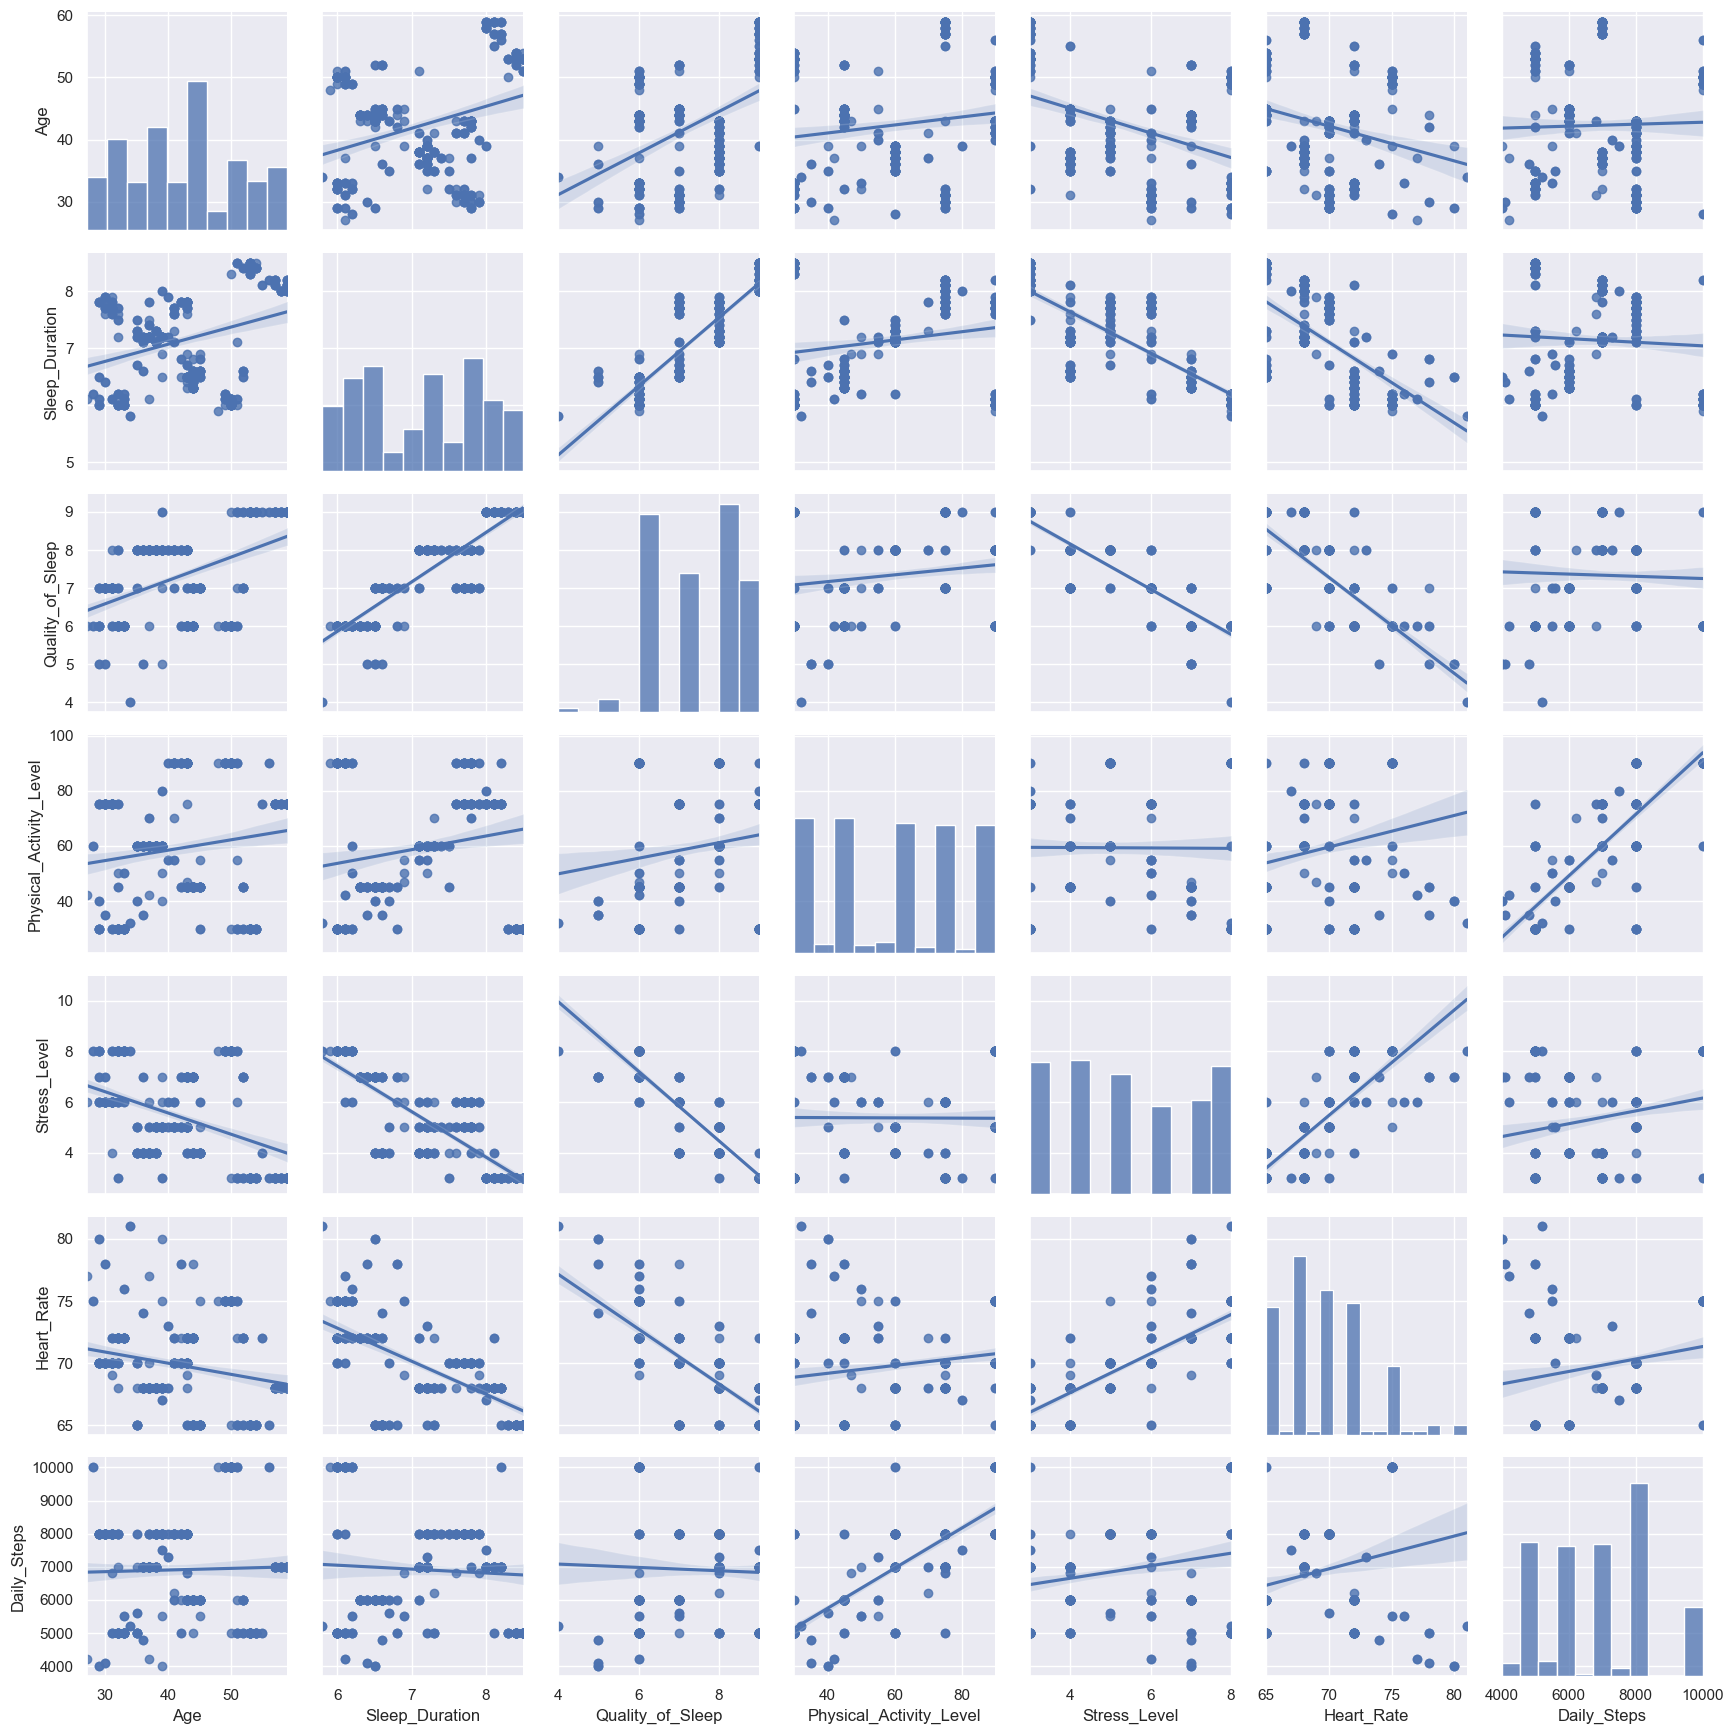

In [792]:
sns.pairplot(data=df.loc[:, df.columns != "Person_ID"],kind="reg")
plt.tight_layout
plt.show()

/var/folders/dk/d3npzx0d78711ddgq33dpxgh0000gn/T/ipykernel_22853/2023412913.py:9: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



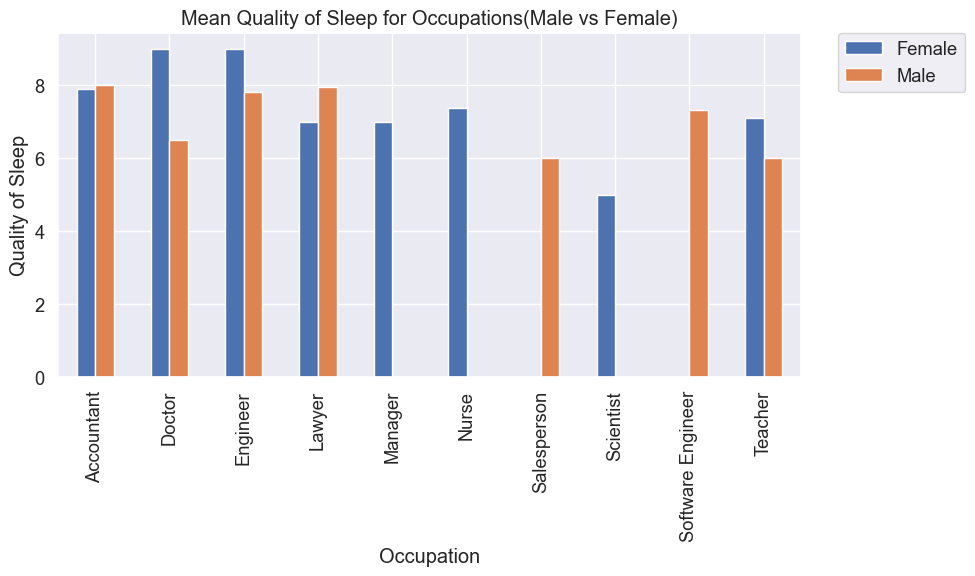

'  Quality of Sleep seems to be lower for Overweight and obese people in all Occupations, except for Nurses  '

In [793]:

piv = df.pivot_table(values="Quality_of_Sleep",
                     index="Occupation",
                     columns="Gender", 
                     aggfunc=np.mean)

sns.set(rc = {'figure.figsize':(10,6)})
sns.set(font_scale=1.2)

piv.plot(kind="bar", ylabel="Quality of Sleep").set(title="Mean Quality of Sleep for Occupations(Male vs Female)")
plt.tight_layout
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()
"""  Quality of Sleep seems to be lower for Overweight and obese people in all Occupations, except for Nurses  """



In [794]:
#sns.violinplot(y="Quality_of_Sleep", x="BMI_Category", data=df,hue="Gender")
#sns.swarmplot(y="Quality_of_Sleep", x="Sleep_Disorder", data=df,color='black',size=3)

4: Looking at specifics.

Extended sleep duration is  associated with an improved quality of sleep, particularly for individuals who grapple with sleeping disorders.

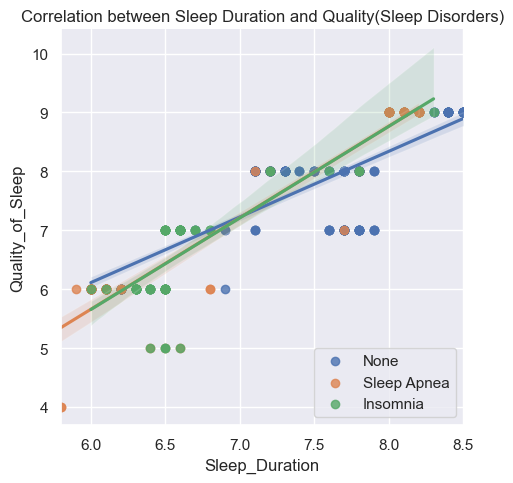

In [809]:
sns.set(rc = {'figure.figsize':(4,8)})
sns.set(font_scale=1)

sns.lmplot(data=df, x="Sleep_Duration", 
           y ="Quality_of_Sleep", 
           hue="Sleep_Disorder", 
           legend=False).set(title="Correlation between Sleep Duration and Quality(Sleep Disorders)")
plt.legend(loc='lower right')
plt.tight_layout
plt.show()

Women show greater quality of sleep compared to men and Quality of sleep is lower for people who`s affected by Sleep Apnea and Insomnia.

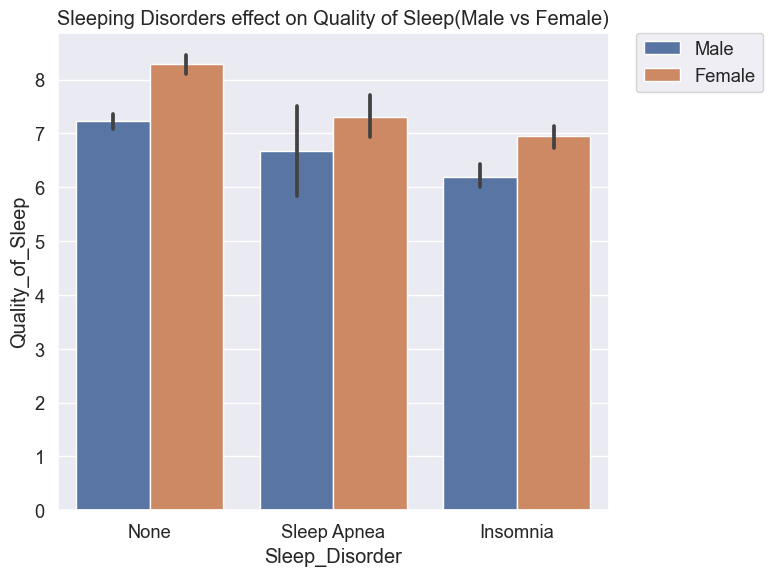

In [796]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.set(font_scale=1.2)

sns.barplot(x="Sleep_Disorder", 
            y="Quality_of_Sleep",
            data=df, 
            hue="Gender", 
            estimator=np.mean 
            ).set(title="Sleeping Disorders effect on Quality of Sleep(Male vs Female)")

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

plt.tight_layout
plt.show()

There is a link between obesity and a negative impact on the quality of sleep.

(The available data, though limited, indicates a potential association between obesity and better sleep quality in men compared to overweight men. However, it's essential to note that the sample size for the obese category is small, with only 10 values (9 for men and 1 for women), which is insufficient to draw conclusive results. Further data is needed to validate these findings and establish a more robust understanding of the relationship between obesity and sleep quality.)

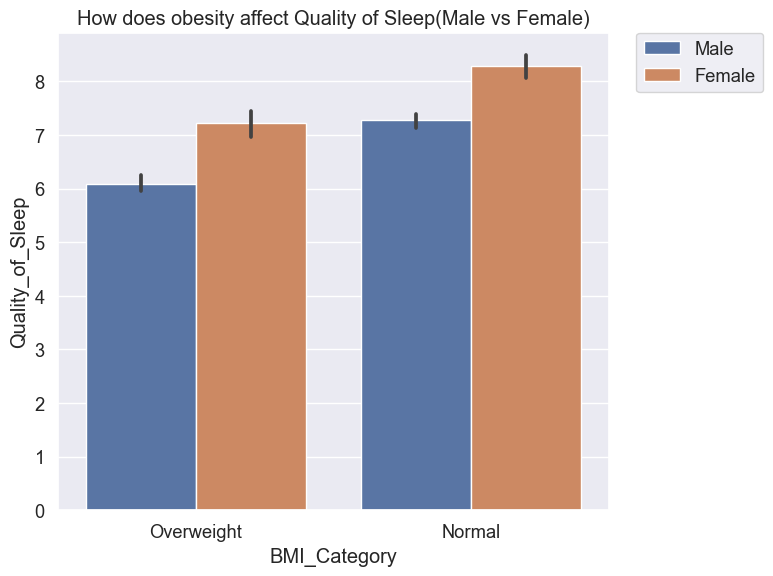

In [797]:
sns.set(rc = {'figure.figsize':(8,6)})
#sns.set_theme()

sns.set(font_scale=1.2)
sns.barplot(x="BMI_Category", 
            y="Quality_of_Sleep",
            data=df, 
            hue="Gender",
            estimator=np.mean 
            ).set(title="How does obesity affect Quality of Sleep(Male vs Female)")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.tight_layout
plt.show()

It is important to consider that there are more overweight women than men in this data set. 

In [798]:
df.groupby("Gender")["BMI_Category"].value_counts()

Gender  BMI_Category
Female  Overweight      106
        Normal           78
Male    Normal          138
        Overweight       42
Name: BMI_Category, dtype: int64

Obesity negatively affects sleep quality at lower sleep durations, but overweight individuals show improved sleep quality when reaching a threshold of around 7 hours of sleep. 

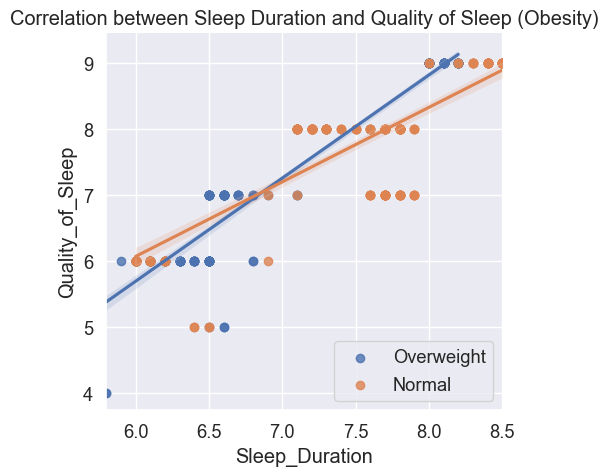

In [799]:
sns.lmplot(data=df, 
           x="Sleep_Duration",
           y ="Quality_of_Sleep",
           hue="BMI_Category",
           legend=False
           ).set(title="Correlation between Sleep Duration and Quality of Sleep (Obesity)")
plt.legend(loc='lower right')
plt.tight_layout
plt.show()


Elevated stress levels are linked to poorer sleep quality, with overweight individuals being more susceptible to the impact of stress on their sleep.

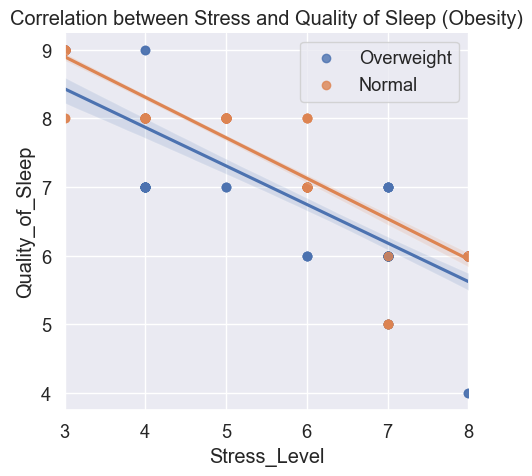

In [800]:
sns.lmplot(data=df, 
           x="Stress_Level",
           y ="Quality_of_Sleep",
           hue="BMI_Category",
           legend=False
           ).set(title="Correlation between Stress and Quality of Sleep (Obesity)")
plt.legend(loc='upper right')
plt.tight_layout
plt.show()

Stress has a stronger negative effect on women's sleep quality than on men's.

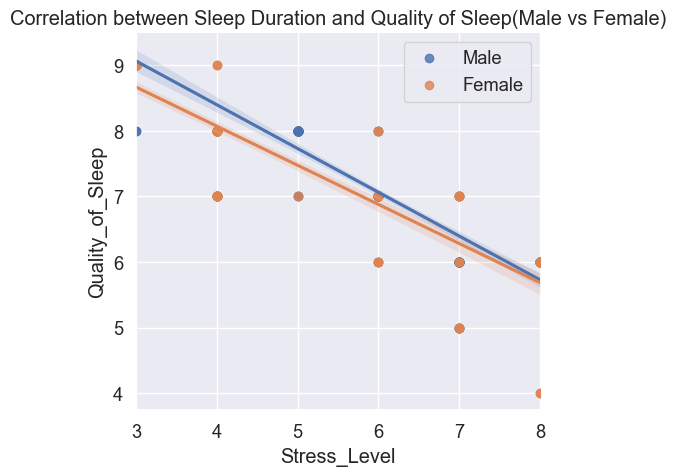

In [801]:
sns.lmplot(data=df, 
           x="Stress_Level",
           y ="Quality_of_Sleep",
           hue="Gender",
           legend=False
           ).set(title="Correlation between Sleep Duration and Quality of Sleep(Male vs Female)")
plt.legend(loc='upper right')
plt.tight_layout
plt.show()

Looking at some specifics, Why does women have greater sleep quality on average compared to men?

In [802]:
doctor = df[df["Occupation"]=="Nurse"]["Quality_of_Sleep"].mean()
nurse = df[df["Occupation"]=="Doctor"]["Quality_of_Sleep"].mean()
print("Mean quality of sleep for Doctor= {doctor} and Nurse ={nurse}".format(doctor=doctor,nurse=nurse))

Mean quality of sleep for Doctor= 7.36986301369863 and Nurse =6.567164179104478


In [803]:
#Physical activity level is more or less identical between men and women
df.groupby("Gender")["Physical_Activity_Level"].mean()

Gender
Female    59.135870
Male      59.438889
Name: Physical_Activity_Level, dtype: float64

In [804]:
#Sleep duration for men and women is very similar
df.groupby("Gender")["Sleep_Duration"].mean()

Gender
Female    7.228804
Male      7.042778
Name: Sleep_Duration, dtype: float64

In [805]:
df.groupby("Gender")["Sleep_Disorder"].value_counts()
#There are more women with sleeping disorders than men in the dataset. 

Gender  Sleep_Disorder
Female  None               82
        Sleep Apnea        66
        Insomnia           36
Male    None              137
        Insomnia           37
        Sleep Apnea         6
Name: Sleep_Disorder, dtype: int64

The lower quality of sleep in men compared to women may be attributed to the increased level of stress.

In [806]:
df.groupby("Gender")["Stress_Level"].mean()
#Men have on average higher stress levels

Gender
Female    4.673913
Male      6.094444
Name: Stress_Level, dtype: float64

Could the higher stress levels in men be attributed to their choice of occupation?

1: In an occupation with a nearly equal distribution of men and women, female engineers exhibit lower stress levels compared to their male counterparts. This suggests that women experience lower stress levels than men, regardless of the occupation.

2: When comparing high male-dominated occupations (e.g., doctors, lawyers, salespeople) to high female-dominated occupations (e.g., nurses, teachers, accountants), men consistently display higher stress levels in all of these professions they dominate. 

While further data is required to reach a definitive conclusion, the current data indicates that men experience higher stress levels than women. This could potentially be a contributing factor to the lower average sleep quality observed in men.
                


In [807]:
piv = df.pivot_table(values="Stress_Level",
                     index="Occupation", 
                     columns="Gender",
                     aggfunc=("count",np.mean))
piv


count            mean          
Gender            Female  Male    Female      Male
Occupation                                        
Accountant          36.0   1.0  4.555556  6.000000
Doctor               2.0  65.0  3.000000  7.015385
Engineer            32.0  31.0  3.000000  4.806452
Lawyer               1.0  44.0  6.000000  5.045455
Manager              1.0   NaN  5.000000       NaN
Nurse               73.0   NaN  5.547945       NaN
Salesperson          NaN  32.0       NaN  7.000000
Scientist            4.0   NaN  7.000000       NaN
Software Engineer    NaN   3.0       NaN  5.333333
Teacher             35.0   4.0  4.285714  6.000000

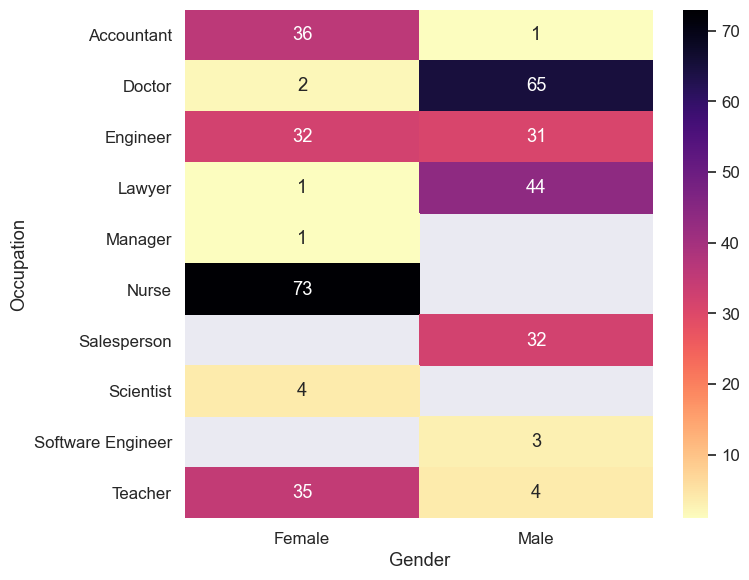

In [808]:

sns.set(font_scale=1.1)

sns.heatmap(data=piv["count"],
            cmap="magma_r",
            annot=True)
plt.show()